In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
#!/bin/bash
!kaggle datasets download moltean/fruits

Dataset URL: https://www.kaggle.com/datasets/moltean/fruits
License(s): CC-BY-SA-4.0
100% 962M/964M [00:44<00:00, 24.7MB/s]
100% 964M/964M [00:44<00:00, 22.5MB/s]


In [ ]:
#Importing required libraries
import zipfile
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns

In [ ]:
#unziping the folder
zip_ref = zipfile.ZipFile("fruits.zip", "r")
zip_ref.extractall("fruits360")
zip_ref.close()

In [ ]:
# First, we are going to load the file names and their respective target labels into numpy array!
from sklearn.datasets import load_files
import numpy as np

train_dir = '/content/fruits360/fruits-360_dataset_100x100/fruits-360/Training'
test_dir = '/content/fruits360/fruits-360_dataset_100x100/fruits-360/Test'

def load_dataset(path):
    data = load_files(path)
    files = np.array(data['filenames'])
    targets = np.array(data['target'])
    target_labels = np.array(data['target_names'])
    return files,targets,target_labels

x_train, y_train,target_labels = load_dataset(train_dir)
x_test, y_test,_ = load_dataset(test_dir)
print('Loading complete!')

print('Training set size : ' , x_train.shape[0])
print('Testing set size : ', x_test.shape[0])



Loading complete!
Training set size :  70491
Testing set size :  23619


In [ ]:
# Let's confirm the number of classes :p
no_of_classes = len(np.unique(y_train))
no_of_classes

141

In [ ]:
print(y_train[0:10])
# target labels are numbers corresponding to class label. We need to change them to a vector of 81 elements.

[ 81 138 104  24  40  24  57  31 108  67]


In [ ]:
from tensorflow.keras.utils import to_categorical # Import to_categorical directly from tensorflow.keras.utils

y_train = to_categorical(y_train, no_of_classes) # Use to_categorical directly
y_test = to_categorical(y_test, no_of_classes)
y_train[0] # Note that only one element has value 1(corresponding to its label) and others are 0.

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.])

In [ ]:
# Now, we have to divide the validation set into test and validation set
x_test,x_valid = x_test[7000:],x_test[:7000]
y_test,y_vaild = y_test[7000:],y_test[:7000]
print('Vaildation X : ',x_valid.shape)
print('Vaildation y :',y_vaild.shape)
print('Test X : ',x_test.shape)
print('Test y : ',y_test.shape)

Vaildation X :  (7000,)
Vaildation y : (7000, 141)
Test X :  (16619,)
Test y :  (16619, 141)


In [ ]:
x_train[0]
# training data is just file names of images. We need to convert them into pixel matrix.

'/content/fruits360/fruits-360_dataset_100x100/fruits-360/Training/Onion Red 1/r_156_100.jpg'

In [ ]:
# We just have the file names in the x set. Let's load the images and convert them into array.
from keras.preprocessing.image import array_to_img, img_to_array, load_img

def convert_image_to_array(files):
    images_as_array=[]
    for file in files:
        # Convert to Numpy Array
        images_as_array.append(img_to_array(load_img(file)))
    return images_as_array

x_train = np.array(convert_image_to_array(x_train))
print('Training set shape : ',x_train.shape)

x_valid = np.array(convert_image_to_array(x_valid))
print('Validation set shape : ',x_valid.shape)

x_test = np.array(convert_image_to_array(x_test))
print('Test set shape : ',x_test.shape)

print('1st training image shape ',x_train[0].shape)


Training set shape :  (70491, 100, 100, 3)
Validation set shape :  (7000, 100, 100, 3)
Test set shape :  (16619, 100, 100, 3)
1st training image shape  (100, 100, 3)


In [ ]:
print('1st training image as array',x_train[0]) # don't worry if you see only 255s..
# there are elements will other values too :p

1st training image as array [[[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 ...

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]]


In [ ]:
# time to re-scale so that all the pixel values lie within 0 to 1
x_train = x_train.astype('float32')/255
x_valid = x_valid.astype('float32')/255
x_test = x_test.astype('float32')/255
x_train[0]

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]], dtype=float32)

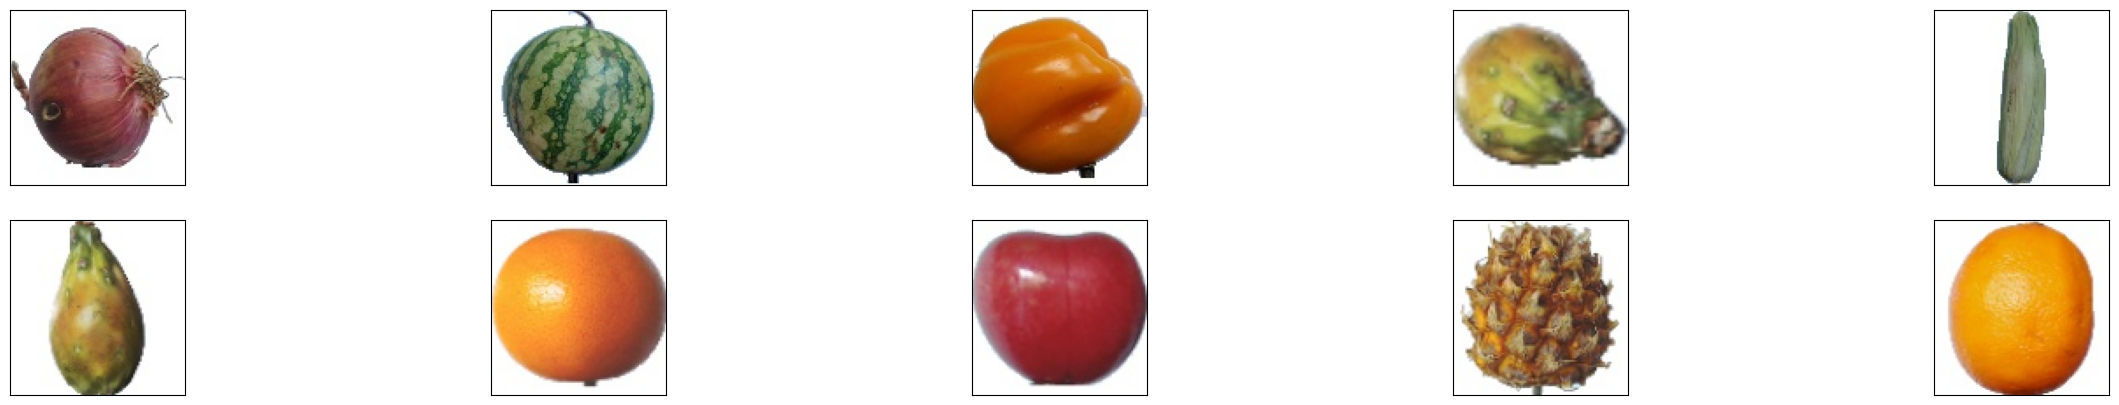

In [ ]:
#Let's visualize the first 10 training images!
import matplotlib.pyplot as plt

fig = plt.figure(figsize =(30,5))
for i in range(10):
    ax = fig.add_subplot(2,5,i+1,xticks=[],yticks=[])
    ax.imshow(np.squeeze(x_train[i]))
# Yummy fruits ;)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [ ]:
#Simple CNN from scratch - we are using 3 Conv layers followed by maxpooling layers.
# At the end we add dropout, flatten and some fully connected layers(Dense).

from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D
from keras.layers import Activation, Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras import backend as K

model = Sequential()
model.add(Conv2D(filters = 16, kernel_size = 2,input_shape=(100,100,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters = 32,kernel_size = 2,activation= 'relu',padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters = 64,kernel_size = 2,activation= 'relu',padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters = 128,kernel_size = 2,activation= 'relu',padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(150))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(141,activation = 'softmax'))
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 100, 100, 16)        │             208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 100, 100, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 50, 50, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 50, 50, 32)          │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 25, 25, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 25, 25, 64)          │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 128)         │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 150)                 │         691,350 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 150)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 150)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 141)                 │          21,291 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 756,081 (2.88 MB)

 Trainable params: 756,081 (2.88 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
print('Compiled!')

Compiled!


In [ ]:
batch_size = 32

checkpointer = ModelCheckpoint(filepath = 'cnn_from_fruits.keras', verbose = 1, save_best_only = True)

history = model.fit(x_train,y_train,
        batch_size = 32,
        epochs=30,
        validation_data=(x_valid, y_vaild),
        callbacks = [checkpointer],
        verbose=2, shuffle=True)

Epoch 1/30

Epoch 1: val_loss improved from inf to 0.32266, saving model to cnn_from_scratch_fruits.keras
2203/2203 - 28s - 13ms/step - accuracy: 0.6882 - loss: 1.1512 - val_accuracy: 0.9180 - val_loss: 0.3227
Epoch 2/30

Epoch 2: val_loss improved from 0.32266 to 0.17176, saving model to cnn_from_scratch_fruits.keras
2203/2203 - 8s - 4ms/step - accuracy: 0.9417 - loss: 0.1741 - val_accuracy: 0.9587 - val_loss: 0.1718
Epoch 3/30

Epoch 3: val_loss improved from 0.17176 to 0.15162, saving model to cnn_from_scratch_fruits.keras
2203/2203 - 8s - 4ms/step - accuracy: 0.9661 - loss: 0.1067 - val_accuracy: 0.9671 - val_loss: 0.1516
Epoch 4/30

Epoch 4: val_loss did not improve from 0.15162
2203/2203 - 8s - 4ms/step - accuracy: 0.9737 - loss: 0.0832 - val_accuracy: 0.9679 - val_loss: 0.1990
Epoch 5/30

Epoch 5: val_loss improved from 0.15162 to 0.14317, saving model to cnn_from_scratch_fruits.keras
2203/2203 - 8s - 4ms/step - accuracy: 0.9791 - loss: 0.0671 - val_accuracy: 0.9760 - val_loss: 

In [ ]:
# saving model to drive
model.save('/content/drive/MyDrive/cnn_from_fruits.keras')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)  # Preprocess images
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(100, 100),  # Adjust to match your model input shape
    batch_size=32,
    class_mode='categorical'  # Use 'binary' for binary classification
)

# Now evaluate the model using the generator
train_loss, train_acc = model.evaluate(train_generator)

Found 70491 images belonging to 141 classes.
   9/2203 ━━━━━━━━━━━━━━━━━━━━ 34s 16ms/step - accuracy: 1.0000 - loss: 0.0041

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2203/2203 ━━━━━━━━━━━━━━━━━━━━ 35s 16ms/step - accuracy: 0.9999 - loss: 4.9037e-04


In [ ]:
history.history

{'accuracy': [0.6882154941558838,
  0.9416804909706116,
  0.9660524129867554,
  0.9736987948417664,
  0.9791321158409119,
  0.9820544719696045,
  0.9841539859771729,
  0.984920084476471,
  0.986437976360321,
  0.9871756434440613,
  0.988821268081665,
  0.9889631271362305,
  0.9900554418563843,
  0.9897575378417969,
  0.9906229376792908,
  0.9906513094902039,
  0.9914031624794006,
  0.991516649723053,
  0.9924954771995544,
  0.9916017651557922,
  0.9929210543632507,
  0.9919564127922058,
  0.9930204153060913,
  0.9928643107414246,
  0.993403434753418,
  0.9932332038879395,
  0.9932332038879395,
  0.9937864542007446,
  0.9935452938079834,
  0.9936304092407227],
 'loss': [1.1511565446853638,
  0.1741294115781784,
  0.10670612752437592,
  0.08321043103933334,
  0.06707925349473953,
  0.05961424857378006,
  0.05443780496716499,
  0.05184086039662361,
  0.046913281083106995,
  0.04662010446190834,
  0.04078663885593414,
  0.04110224172472954,
  0.03814114257693291,
  0.04032668471336365,
  0

**Accuracy Visualization**

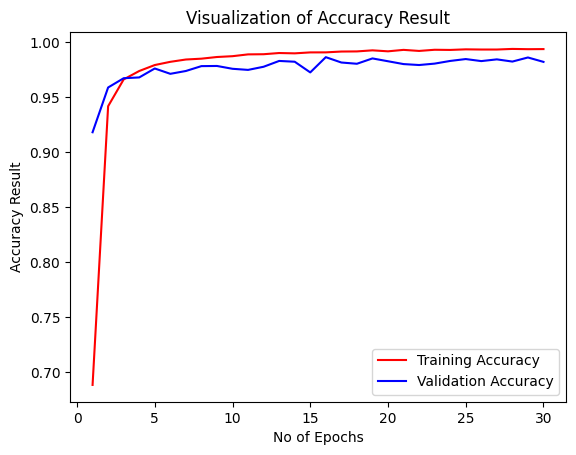

In [ ]:
epochs = [i for i in range(1, 31)]
plt.plot(epochs, history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs, history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("No of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

**Metrics for evaluation**

In [ ]:
target_labels

array(['Apple 6', 'Apple Braeburn 1', 'Apple Crimson Snow 1',
       'Apple Golden 1', 'Apple Golden 2', 'Apple Golden 3',
       'Apple Granny Smith 1', 'Apple Pink Lady 1', 'Apple Red 1',
       'Apple Red 2', 'Apple Red 3', 'Apple Red Delicious 1',
       'Apple Red Yellow 1', 'Apple Red Yellow 2', 'Apple hit 1',
       'Apricot 1', 'Avocado 1', 'Avocado ripe 1', 'Banana 1',
       'Banana Lady Finger 1', 'Banana Red 1', 'Beetroot 1',
       'Blueberry 1', 'Cabbage white 1', 'Cactus fruit 1', 'Cantaloupe 1',
       'Cantaloupe 2', 'Carambula 1', 'Carrot 1', 'Cauliflower 1',
       'Cherry 1', 'Cherry 2', 'Cherry Rainier 1', 'Cherry Wax Black 1',
       'Cherry Wax Red 1', 'Cherry Wax Yellow 1', 'Chestnut 1',
       'Clementine 1', 'Cocos 1', 'Corn 1', 'Corn Husk 1', 'Cucumber 1',
       'Cucumber 3', 'Cucumber Ripe 1', 'Cucumber Ripe 2', 'Dates 1',
       'Eggplant 1', 'Eggplant long 1', 'Fig 1', 'Ginger Root 1',
       'Granadilla 1', 'Grape Blue 1', 'Grape Pink 1', 'Grape White 1'

In [ ]:
# prompt: make classification report print in column one by one

from sklearn.metrics import classification_report

# Assuming you have y_test and predicted_y from your model's evaluation
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)


report = classification_report(y_true_classes, y_pred_classes, target_names=target_labels, digits=4)
print(report)


520/520 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
                       precision    recall  f1-score   support

              Apple 6     0.9576    1.0000    0.9784       113
     Apple Braeburn 1     0.8980    0.7586    0.8224       116
 Apple Crimson Snow 1     1.0000    1.0000    1.0000        97
       Apple Golden 1     1.0000    1.0000    1.0000       111
       Apple Golden 2     1.0000    1.0000    1.0000       105
       Apple Golden 3     0.7902    1.0000    0.8828       113
 Apple Granny Smith 1     1.0000    0.8305    0.9074       118
    Apple Pink Lady 1     0.9060    1.0000    0.9507       106
          Apple Red 1     1.0000    1.0000    1.0000       122
          Apple Red 2     0.9244    1.0000    0.9607       110
          Apple Red 3     1.0000    1.0000    1.0000       104
Apple Red Delicious 1     1.0000    1.0000    1.0000       117
   Apple Red Yellow 1     0.9730    1.0000    0.9863       108
   Apple Red Yellow 2     0.9932    1.0000    0.9966       145
          App

520/520 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


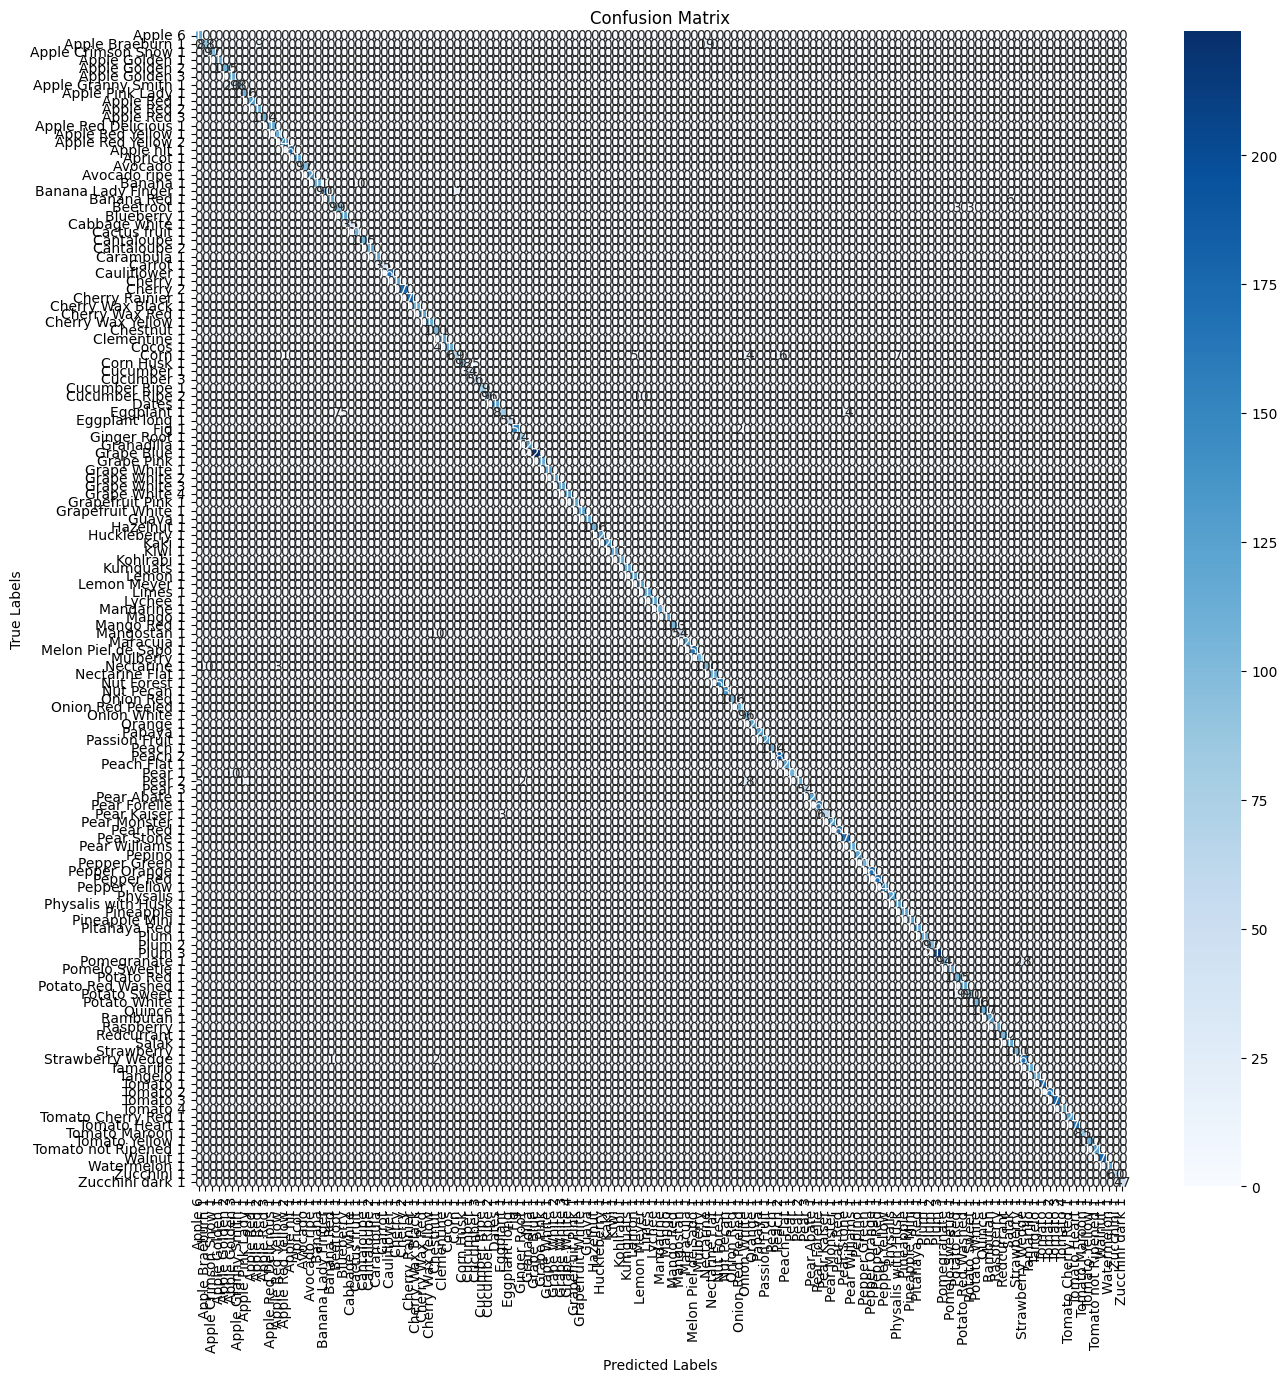

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have y_test and predicted_y from your model's evaluation
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(15, 15))  # Adjust figure size as needed
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_labels, yticklabels=target_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

**TEST PREDICTION**

In [ ]:
# load the weights that yielded the best validation accuracy
model.load_weights('cnn_from_scratch_fruits.keras')

520/520 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


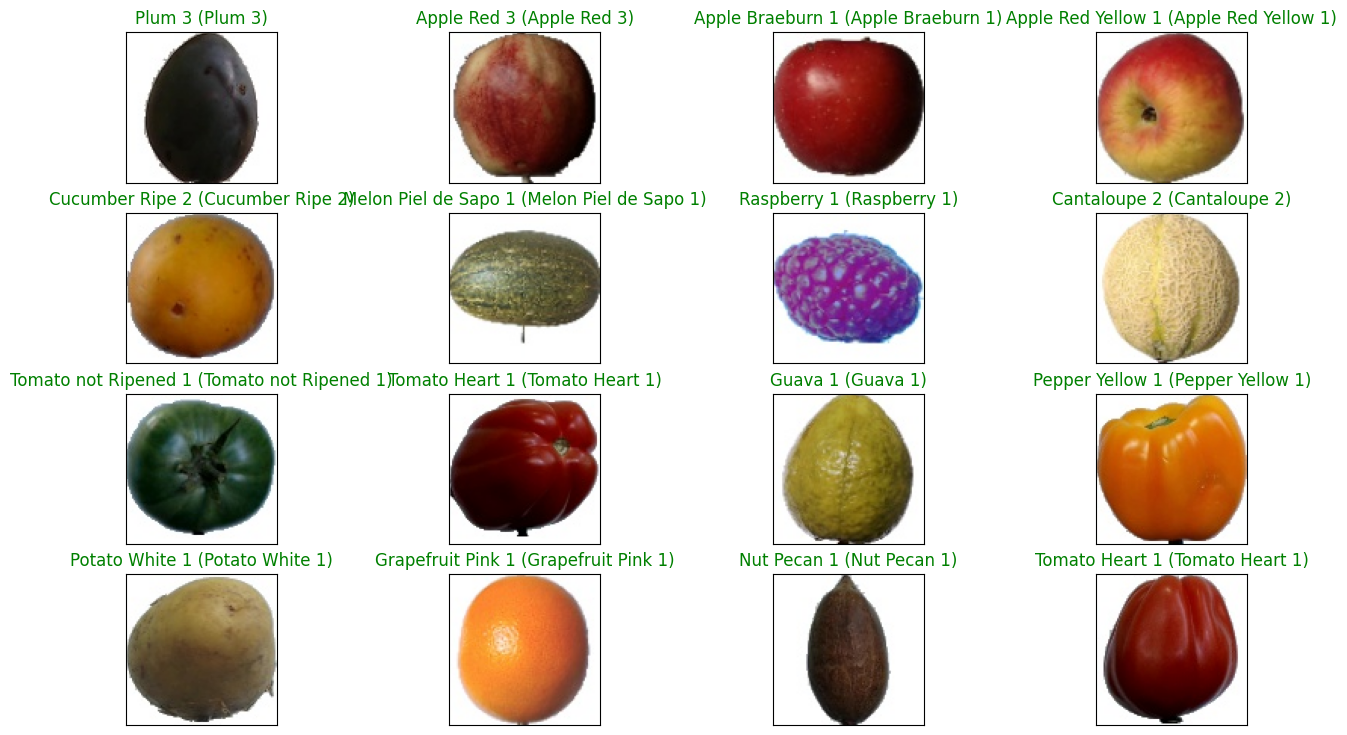

In [ ]:
# Let's visualize test prediction.

y_pred = model.predict(x_test)

# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(16, 9))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=16, replace=False)):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_pred[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(target_labels[pred_idx], target_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))

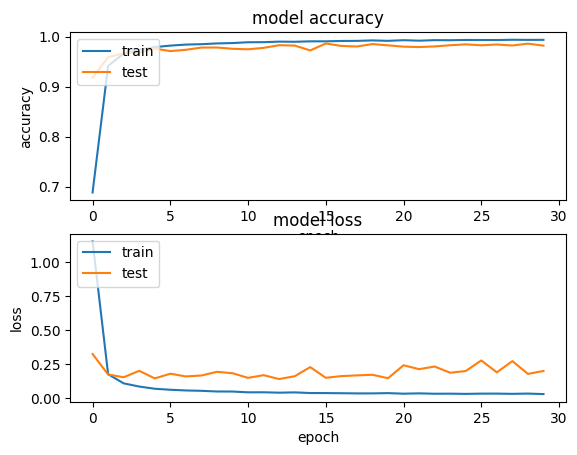

In [ ]:
#Finally lets visualize the loss and accuracy wrt epochs

import matplotlib.pyplot as plt
plt.figure(1)

 # summarize history for accuracy

plt.subplot(211)
plt.plot(history.history['accuracy'])  # Changed 'acc' to 'accuracy'
plt.plot(history.history['val_accuracy'])  # Changed 'val_acc' to 'val_accuracy'
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

 # summarize history for loss

plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()